In [500]:
"""
    Feature engineering in training data and building up the model
"""

'\n    Feature engineering in training data and building up the model\n'

In [501]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [502]:
# Finding the csv from the league
# Multi League directory
country = 'GB'
season = '2019'
dirCountry = '../' + country + '/'
# csv to save
file_title = 'premier.csv'
csv_file = dirCountry + file_title

In [503]:
# Retrieving previous saved data
df_laliga = pd.read_csv(csv_file) 
df_laliga = df_laliga.drop(df_laliga.columns[0], axis=1)
df_laliga = df_laliga.drop(columns=["stats_home","stats_away"], axis=1)

In [504]:
# None values set to 0
df_laliga.fillna(value=0, inplace=True)

In [505]:
# g_diff_home: an integer of the goals difference for home
df_laliga["g_diff_home"] = df_laliga["goals_home"] - df_laliga["goals_away"]
df_laliga.head()

,goals_home,goals_away,league,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,...,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home
0,1.0,3.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,5.0,3.0,44%,1.0,0.0,5.0,341.0,234.0,69%,-2.0
1,2.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,6.0,1.0,65%,3.0,0.0,1.0,539.0,435.0,81%,2.0
2,2.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,3.0,0.0,40%,4.0,0.0,1.0,281.0,177.0,63%,0.0
3,0.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,4.0,3.0,54%,3.0,1.0,5.0,470.0,391.0,83%,0.0
4,1.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,5.0,2.0,38%,2.0,0.0,6.0,295.0,208.0,71%,-1.0


In [506]:
# g_diff_away: an integer of the goals difference for away
df_laliga["g_diff_away"] = df_laliga["goals_away"] - df_laliga["goals_home"]
df_laliga.head()

,goals_home,goals_away,league,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,...,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away
0,1.0,3.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,3.0,44%,1.0,0.0,5.0,341.0,234.0,69%,-2.0,2.0
1,2.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,1.0,65%,3.0,0.0,1.0,539.0,435.0,81%,2.0,-2.0
2,2.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,0.0,40%,4.0,0.0,1.0,281.0,177.0,63%,0.0,0.0
3,0.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,3.0,54%,3.0,1.0,5.0,470.0,391.0,83%,0.0,0.0
4,1.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,2.0,38%,2.0,0.0,6.0,295.0,208.0,71%,-1.0,1.0


In [507]:
# Set win as 1, draw as 0 and lose as -1
def get_status(r):
    if r["goals_home"] > r["goals_away"]:
        return 1
    elif r["goals_home"] == r["goals_away"]:
        return 0
    else:
        return -1

In [508]:
"""
    Form: last 5 losses
        last 5 wins
        last 5 draws
"""
# Home
df_laliga["wins_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('W'))
df_laliga["loses_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('L'))
df_laliga["draws_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('D'))
# Away
df_laliga["wins_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('W'))
df_laliga["loses_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('L'))
df_laliga["draws_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('D'))

df_laliga.head()

,goals_home,goals_away,league,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,1.0,3.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,234.0,69%,-2.0,2.0,1,3,1,2,0,3
1,2.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,435.0,81%,2.0,-2.0,1,3,1,1,2,2
2,2.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,177.0,63%,0.0,0.0,1,3,1,2,0,3
3,0.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,391.0,83%,0.0,0.0,1,3,1,3,1,1
4,1.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,Relegation - Championship,...,208.0,71%,-1.0,1.0,1,3,1,1,3,1


In [509]:
# Promotion: either Champions, UEFA Europe, Second division
# Label encoder vs Noramlize unicode encoder
description = np.unique(df_laliga["team_home.description"].astype(str))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.description"] = enc.transform(df_laliga["team_home.description"].astype(str))
df_laliga["team_away.description"] = enc.transform(df_laliga["team_away.description"].astype(str))
df_laliga.head()

,goals_home,goals_away,league,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,1.0,3.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,234.0,69%,-2.0,2.0,1,3,1,2,0,3
1,2.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,435.0,81%,2.0,-2.0,1,3,1,1,2,2
2,2.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,177.0,63%,0.0,0.0,1,3,1,2,0,3
3,0.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,391.0,83%,0.0,0.0,1,3,1,3,1,1
4,1.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,208.0,71%,-1.0,1.0,1,3,1,1,3,1


In [510]:
def score_home(best):
    if best != 0:
        return int(best[0]) - int(best[2])
    return best

In [511]:
def score_away(best):
    if best != 0:
        return int(best[2]) - int(best[0])
    return best

In [512]:
# For best_lose
df_laliga["team_away.stats_home.streaks.best_lose"] = df_laliga["team_away.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_lose"] = df_laliga["team_away.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_away.stats_home.streaks.best_win"] = df_laliga["team_away.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_win"] = df_laliga["team_away.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,goals_home,goals_away,league,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,1.0,3.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,234.0,69%,-2.0,2.0,1,3,1,2,0,3
1,2.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,435.0,81%,2.0,-2.0,1,3,1,1,2,2
2,2.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,177.0,63%,0.0,0.0,1,3,1,2,0,3
3,0.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,391.0,83%,0.0,0.0,1,3,1,3,1,1
4,1.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,208.0,71%,-1.0,1.0,1,3,1,1,3,1


In [513]:
# For best_lose
df_laliga["team_home.stats_home.streaks.best_lose"] = df_laliga["team_home.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_lose"] = df_laliga["team_home.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_home.stats_home.streaks.best_win"] = df_laliga["team_home.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_win"] = df_laliga["team_home.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,goals_home,goals_away,league,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,1.0,3.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,234.0,69%,-2.0,2.0,1,3,1,2,0,3
1,2.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,435.0,81%,2.0,-2.0,1,3,1,1,2,2
2,2.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,177.0,63%,0.0,0.0,1,3,1,2,0,3
3,0.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,391.0,83%,0.0,0.0,1,3,1,3,1,1
4,1.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,208.0,71%,-1.0,1.0,1,3,1,1,3,1


In [514]:
# Posession % to decimal as p_percentage
df_laliga["stats_away.p_percentage"] = df_laliga["stats_away.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.p_percentage"] = df_laliga["stats_home.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_away.possession"] = df_laliga["stats_away.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.possession"] = df_laliga["stats_home.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga.head()

,goals_home,goals_away,league,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,1.0,3.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,234.0,0.69,-2.0,2.0,1,3,1,2,0,3
1,2.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,435.0,0.81,2.0,-2.0,1,3,1,1,2,2
2,2.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,177.0,0.63,0.0,0.0,1,3,1,2,0,3
3,0.0,0.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,391.0,0.83,0.0,0.0,1,3,1,3,1,1
4,1.0,2.0,39,66,Aston Villa,19,31,-27,DWLLL,4,...,208.0,0.71,-1.0,1.0,1,3,1,1,3,1


In [515]:
"""
    Following this premise:
    - Away standings from home team aren't relevant
    - Home standings from away team aren't relevant
"""
# Drop away standings
df_premise = df_laliga.drop(df_laliga.filter(regex='team_away.stats_home.').columns, axis=1)
df_premise = df_laliga.drop(df_laliga.filter(regex='team_home.stats_away.').columns, axis=1)
print(df_premise.shape)

(395, 108)


In [516]:
"""
    Here the unseen data will be built as test set
"""
#p37 = [[531, 537], [529, 727], [543, 542], [538, 539], [545, 720], [546, 530], [798, 715], 
       #[541, 533], [548, 536], [532, 540], [542, 529], [530, 548], [540, 538], [715, 531], [537, 541], [539, 546], [727, 798], 
       #[536, 532], [533, 545], [720, 543]]
p38 = [[542, 529], [530, 548], [540, 538], [715, 531], [537, 541], [539, 546], [727, 798], 
       [536, 532], [533, 545], [720, 543]]

In [517]:
"""
    Here the unseen data will be built as test set
"""
p37 = [[33, 49],[71, 44], [35, 41], [47, 46], [51, 34], [62, 45], [39, 52], [38, 50], [66, 42], [33, 48],
       [40, 49], [42, 38], [44, 51], [49, 39], [52, 47], [45, 35], [46, 33], [50, 71], [34, 40], [41, 62], 
       [48, 66]]

In [518]:
# Getting previous record
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p37:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])])
ts_premise.head()

,goals_home,goals_away,league,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
106,4.0,0.0,39,33,Manchester United,5,62,28,WDWWW,2,...,442.0,0.85,4.0,-4.0,4,0,1,3,2,0
382,0.0,0.0,45,33,Manchester United,5,62,28,WDWWW,2,...,0.0,0.00,0.0,0.0,4,0,1,3,2,0
310,0.0,2.0,39,71,Norwich,20,21,-44,LLLLL,4,...,403.0,0.87,-2.0,2.0,0,5,0,2,0,3
47,0.0,0.0,39,35,Bournemouth,18,31,-25,LWDLL,4,...,0.0,0.00,0.0,0.0,1,3,1,2,0,3
373,0.0,0.0,39,47,Tottenham,7,55,11,WWDWL,0,...,0.0,0.00,0.0,0.0,3,1,1,2,2,1


In [519]:
print(ts_laliga.shape)
print(ts_premise.shape)

(22, 125)
(22, 108)


In [520]:
# Remove categorical values as team_away and team_home names, team_home.form
df_laliga = df_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
df_laliga.head()
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

(395, 121)


In [521]:
# Auxiliar for team names
ts_name = pd.DataFrame()
ts_name["team_home.team.name"] = ts_laliga["team_home.team.name"]
ts_name["team_away.team.name"] = ts_laliga["team_away.team.name"]
ts_laliga = ts_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
ts_premise = ts_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

In [522]:
# This is done before training, after building testing
#for match in p37:
    #df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    #df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
for match in p37:
    df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
print(df_laliga.shape)
print(df_premise.shape)

(373, 121)
(373, 104)


In [523]:
# status_home: either win, draw or lose for home team, predicted label
label = []
for index, row in df_laliga.iterrows():
    label.append(get_status(row))
print(label)

[-1, 1, 0, 0, -1, -1, 1, 1, -1, 1, -1, 0, 1, 1, -1, -1, -1, -1, -1, 1, 1, 0, 1, 1, 1, 1, -1, 1, 1, 1, 0, 1, 1, 1, 1, 1, -1, -1, -1, 0, 0, 0, 0, 1, 1, -1, -1, 0, 1, 1, 0, -1, 1, -1, 0, -1, 0, -1, -1, -1, 0, 1, -1, 1, 0, 0, -1, 1, -1, 1, 1, 0, 1, 1, -1, -1, 0, -1, 1, 0, 0, 0, 0, 0, 0, 1, 1, -1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, -1, 0, 1, 0, 1, 1, 1, -1, 0, 1, 1, 0, -1, -1, 1, 0, 1, 0, 0, -1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, -1, 1, -1, 1, 1, 0, -1, 0, 1, 0, -1, -1, 1, 1, 1, 0, 1, -1, -1, 1, 1, -1, 1, 0, 1, 0, -1, 0, 0, -1, -1, 0, 1, -1, 1, 0, 1, -1, 1, -1, 1, 0, -1, 1, 0, -1, 1, -1, -1, 1, 0, 1, 1, 0, 1, -1, 1, 1, 1, -1, 1, 1, 0, -1, 0, 1, 1, 0, 1, 1, -1, 1, 0, 1, 1, 0, -1, -1, 0, 0, 0, -1, -1, -1, 1, -1, -1, 1, -1, 0, -1, 1, 0, 0, 1, 1, -1, 0, 1, 0, 1, -1, 0, 1, -1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, -1, -1, 1, -1, 0, 1, 1, -1, -1, -1, 1, -1, 0, 0, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 0, -1, 1, -1, 0, 0, -1, 1, 1, -1, 1, 0, 1, -1, 1, -1, 0, -1, 1, -1, -1, 1, -1, -1, 0, -

In [524]:
# Missing linear regression for goals_home and goals_away, as goal_diff
df_laliga = df_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_laliga = ts_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_premise = ts_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])

(373, 117)


In [525]:
# La liga
# GET avg for team_home.stats_home. team_home.stats_away. team_away.stats_home. team_away.stats_away.
columns_home = df_laliga.filter(regex='^stats_home').columns
#columns_g_home = df_laliga.filter(["goals_home","g_diff_home"]).columns
#columns_home = columns_home.append(columns_g_home)
avg_home_laliga = df_laliga.groupby("team_home.team.id", as_index=True)[columns_home].mean()
avg_home_laliga.head()

,stats_home.s_on_g,stats_home.s_off_g,stats_home.s_in,stats_home.s_out,stats_home.s_total,stats_home.s_blocked,stats_home.fouls,stats_home.corners,stats_home.offside,stats_home.possession,stats_home.c_yellow,stats_home.c_red,stats_home.saves,stats_home.p_total,stats_home.p_accurate,stats_home.p_percentage
team_home.team.id,,,,,,,,,,,,,,,,
33,6.388889,5.888889,16.055556,3.777778,8.333333,7.722222,10.722222,5.388889,1.444444,0.560000,1.388889,0.000000,2.277778,532.611111,447.111111,0.824444
34,4.000000,4.421053,12.368421,3.947368,6.684211,5.684211,9.894737,4.421053,1.947368,0.396316,1.842105,0.052632,3.263158,353.000000,265.473684,0.741053
35,3.157895,4.368421,10.263158,2.736842,6.526316,3.736842,8.842105,4.947368,1.789474,0.430526,2.105263,0.105263,2.894737,386.947368,290.684211,0.740526
38,3.611111,5.388889,13.500000,4.500000,8.833333,4.666667,13.555556,4.555556,1.666667,0.432778,2.166667,0.111111,3.222222,368.166667,273.222222,0.733333
39,3.578947,5.421053,12.473684,3.473684,8.105263,4.368421,9.947368,4.789474,1.052632,0.504737,1.526316,0.000000,2.263158,469.210526,378.789474,0.802632


In [526]:
columns_away = df_laliga.filter(regex='^stats_away').columns
#columns_g_away = df_laliga.filter(["goals_away","g_diff_away"]).columns
#columns_away = columns_home.append(columns_g_away)
avg_away_laliga = df_laliga.groupby("team_away.team.id", as_index=True)[columns_away].mean()
avg_away_laliga.head(10)

,stats_away.s_on_g,stats_away.s_off_g,stats_away.s_in,stats_away.s_out,stats_away.s_total,stats_away.s_blocked,stats_away.fouls,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage
team_away.team.id,,,,,,,,,,,,,,,,
33,5.150000,5.400000,14.250000,3.700000,8.250000,6.000000,11.000000,6.100000,1.350000,0.569500,2.050000,0.000000,2.350000,533.650000,446.350000,0.830000
34,3.055556,3.500000,8.500000,1.944444,5.000000,3.500000,9.500000,3.222222,2.166667,0.374444,1.666667,0.111111,4.111111,330.833333,250.055556,0.750000
35,3.000000,3.388889,9.777778,3.388889,6.388889,3.388889,10.444444,4.833333,1.722222,0.453333,2.111111,0.055556,3.666667,395.333333,302.722222,0.746111
38,2.833333,3.722222,9.000000,2.444444,6.111111,2.888889,11.722222,4.277778,1.722222,0.423889,2.000000,0.055556,2.833333,376.222222,272.944444,0.716667
39,4.105263,4.263158,11.947368,3.578947,7.736842,4.210526,11.052632,5.631579,1.684211,0.460526,1.684211,0.105263,2.578947,411.315789,320.526316,0.767368
40,5.315789,5.210526,14.526316,4.000000,10.000000,4.526316,9.631579,6.315789,1.210526,0.638421,1.473684,0.000000,2.052632,618.263158,519.947368,0.836316
41,5.421053,4.894737,13.631579,3.315789,8.684211,4.947368,13.315789,5.842105,1.578947,0.488947,1.894737,0.000000,2.473684,406.684211,297.789474,0.720000
42,3.300000,3.250000,9.300000,2.750000,6.300000,3.000000,10.100000,5.200000,1.600000,0.548500,2.050000,0.150000,3.450000,501.700000,420.200000,0.834500
44,2.500000,3.722222,8.000000,1.777778,5.666667,2.333333,10.277778,3.777778,1.944444,0.383333,2.055556,0.000000,3.500000,310.888889,210.777778,0.666667


In [527]:
i_th = ts_laliga.columns.get_loc("team_home.team.id")
i_ta = ts_laliga.columns.get_loc("team_away.team.id")
for i in range(len(ts_laliga)):
    for index, row in avg_home_laliga.iterrows():
        if ts_laliga.iloc[i,i_th] == index:
            for c in columns_home:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_laliga)):
    for index, row in avg_away_laliga.iterrows():
        if ts_laliga.iloc[i,i_ta] == index:
            for c in columns_away:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_laliga.head(10)

,league,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
106,39,33,5,62,28,2,18,10,6,2,...,2.166667,618.333333,523.611111,0.842222,4,0,1,3,2,0
382,45,33,5,62,28,2,18,10,6,2,...,2.166667,618.333333,523.611111,0.842222,4,0,1,3,2,0
310,39,71,20,21,-44,4,19,4,3,12,...,3.500000,310.888889,210.777778,0.666667,0,5,0,2,0,3
47,39,35,18,31,-25,4,18,5,6,7,...,2.473684,406.684211,297.789474,0.720000,1,3,1,2,0,3
373,39,47,7,55,11,0,18,11,3,4,...,3.166667,518.777778,427.944444,0.820000,3,1,1,2,2,1
72,39,51,16,37,-16,0,18,5,6,7,...,4.111111,330.833333,250.055556,0.750000,1,3,1,1,3,1
198,39,62,8,54,3,0,18,10,3,5,...,2.894737,421.052632,327.157895,0.770000,3,1,1,1,2,2
227,39,39,6,56,11,3,18,7,7,4,...,3.388889,386.555556,295.277778,0.752778,2,2,1,0,5,0
182,39,38,17,34,-23,0,18,6,6,6,...,2.350000,677.950000,601.750000,0.883000,2,3,0,4,1,0
9,39,66,19,31,-27,4,18,6,3,9,...,3.450000,501.700000,420.200000,0.834500,1,3,1,3,1,1


In [528]:
# Premise
# GET avg for team_home.stats_home. team_away.stats_away.
i_th = ts_premise.columns.get_loc("team_home.team.id")
i_ta = ts_premise.columns.get_loc("team_away.team.id")
for i in range(len(ts_premise)):
    for index, row in avg_home_laliga.iterrows():
        if ts_premise.iloc[i,i_th] == index:
            for c in columns_home:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_premise)):
    for index, row in avg_away_laliga.iterrows():
        if ts_premise.iloc[i,i_ta] == index:
            for c in columns_away:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_premise.head(10)

,league,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
106,39,33,5,62,28,2,18,10,6,2,...,2.166667,618.333333,523.611111,0.842222,4,0,1,3,2,0
382,45,33,5,62,28,2,18,10,6,2,...,2.166667,618.333333,523.611111,0.842222,4,0,1,3,2,0
310,39,71,20,21,-44,4,19,4,3,12,...,3.500000,310.888889,210.777778,0.666667,0,5,0,2,0,3
47,39,35,18,31,-25,4,18,5,6,7,...,2.473684,406.684211,297.789474,0.720000,1,3,1,2,0,3
373,39,47,7,55,11,0,18,11,3,4,...,3.166667,518.777778,427.944444,0.820000,3,1,1,2,2,1
72,39,51,16,37,-16,0,18,5,6,7,...,4.111111,330.833333,250.055556,0.750000,1,3,1,1,3,1
198,39,62,8,54,3,0,18,10,3,5,...,2.894737,421.052632,327.157895,0.770000,3,1,1,1,2,2
227,39,39,6,56,11,3,18,7,7,4,...,3.388889,386.555556,295.277778,0.752778,2,2,1,0,5,0
182,39,38,17,34,-23,0,18,6,6,6,...,2.350000,677.950000,601.750000,0.883000,2,3,0,4,1,0
9,39,66,19,31,-27,4,18,6,3,9,...,3.450000,501.700000,420.200000,0.834500,1,3,1,3,1,1


In [529]:
"""
    Three algorithms:
        - SVM
        - PCA
        - Naive Bayes
    To train, both: premise and regular data
"""

'\n    Three algorithms:\n        - SVM\n        - PCA\n        - Naive Bayes\n    To train, both: premise and regular data\n'

In [530]:
results_laliga = ts_laliga.copy()
results_premise = ts_premise.copy()

In [531]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

In [532]:
# For PCA teams' ids will be removed
pca_laliga = df_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_premise = df_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_laliga = ts_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_premise = ts_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)

In [533]:
# Standardizing the features
pca_laliga = StandardScaler().fit_transform(pca_laliga)
#pca_laliga = normalize(pca_laliga) 
pca_premise = StandardScaler().fit_transform(pca_premise)
#pca_premise = normalize(pca_premise) 
pca_test_laliga = StandardScaler().fit_transform(pca_test_laliga)
#pca_test_laliga = normalize(pca_test_laliga) 
pca_test_premise = StandardScaler().fit_transform(pca_test_premise)
#pca_test_premise= normalize(pca_test_premise) 
# Performs pca to reduce to 10 components
pca_fi = PCA(n_components=20)
pca_laliga_fi = pca_fi.fit_transform(pca_laliga)
pca_premise_fi = pca_fi.fit_transform(pca_premise)
pca_test_laliga_fi = pca_fi.fit_transform(pca_test_laliga)
pca_test_premise_fi = pca_fi.fit_transform(pca_test_premise)
# Performs pca to reduce to 5 components
pca_tw = PCA(n_components=15)
pca_laliga_tw = pca_tw.fit_transform(pca_laliga)
pca_premise_tw = pca_tw.fit_transform(pca_premise)
pca_test_laliga_tw = pca_tw.fit_transform(pca_test_laliga)
pca_test_premise_tw = pca_tw.fit_transform(pca_test_premise)

In [534]:
# Understanding PCA
ex_variance=np.var(pca_premise_fi,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.29267505 0.17589999 0.07245534 0.0545754  0.04865412 0.04196474
 0.0399163  0.0356495  0.03122999 0.02680781 0.02667794 0.02217867
 0.02162789 0.01918404 0.017263   0.01650603 0.0151131  0.01481081
 0.01368738 0.0131229 ]


In [535]:
# Select two components
ex_variance=np.var(pca_premise_tw,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.31580465 0.18980106 0.07818136 0.0588884  0.05249918 0.04528114
 0.04307082 0.03846682 0.03369805 0.02892638 0.02878625 0.02393141
 0.0233371  0.02070012 0.01862726]


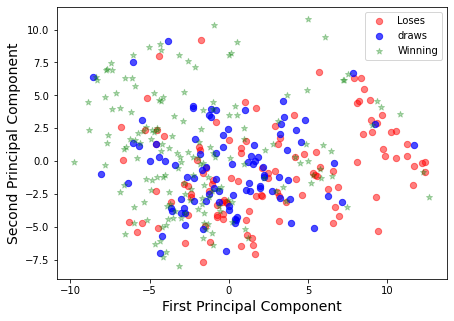

In [536]:
Xax=pca_premise_tw[:,0]
Yax=pca_premise_tw[:,1]
#labels=cancer.target
cdict={-1:'red',1:'green', 0:'blue'}
labl={1:'Winning',-1:'Loses', 0:'draws'}
marker={1:'*',-1:'o', 0:'o'}
alpha={1:.3, -1:.5, 0:.7}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(label):
    ix = np.where(label==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


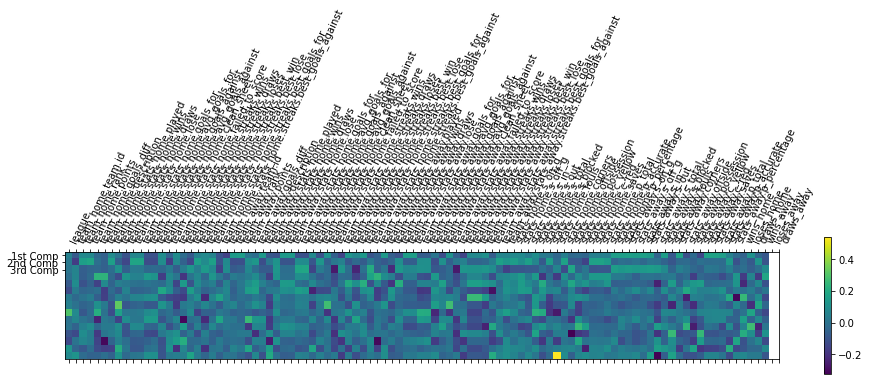

In [537]:
feature_names = df_premise.columns
plt.matshow(pca_tw.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names)),feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [538]:
# SVM algorithm, using premise
from sklearn.svm import SVC
sv_p = SVC(gamma='auto')
sv_p.fit(pca_premise, label)
results_premise["svm"] = sv_p.predict(pca_test_premise)
results_premise.head()

,league,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
106,39,33,5,62,28,2,18,10,6,2,...,618.333333,523.611111,0.842222,4,0,1,3,2,0,1
382,45,33,5,62,28,2,18,10,6,2,...,618.333333,523.611111,0.842222,4,0,1,3,2,0,1
310,39,71,20,21,-44,4,19,4,3,12,...,310.888889,210.777778,0.666667,0,5,0,2,0,3,-1
47,39,35,18,31,-25,4,18,5,6,7,...,406.684211,297.789474,0.720000,1,3,1,2,0,3,-1
373,39,47,7,55,11,0,18,11,3,4,...,518.777778,427.944444,0.820000,3,1,1,2,2,1,-1


In [539]:
print(results_premise["svm"])

106    1
382    1
310   -1
47    -1
373   -1
72    -1
198    1
227    1
182   -1
9      0
102    1
349    1
127    1
158    1
323    0
245    0
149    1
249    0
20     1
93    -1
282   -1
299    1
Name: svm, dtype: int64


In [540]:
# SVM, Not using premise
sv = SVC(gamma='auto')
sv.fit(pca_laliga, label)
results_laliga["svm"] = sv.predict(pca_test_laliga)
results_laliga.head()

,league,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm
106,39,33,5,62,28,2,18,10,6,2,...,618.333333,523.611111,0.842222,4,0,1,3,2,0,1
382,45,33,5,62,28,2,18,10,6,2,...,618.333333,523.611111,0.842222,4,0,1,3,2,0,1
310,39,71,20,21,-44,4,19,4,3,12,...,310.888889,210.777778,0.666667,0,5,0,2,0,3,-1
47,39,35,18,31,-25,4,18,5,6,7,...,406.684211,297.789474,0.720000,1,3,1,2,0,3,-1
373,39,47,7,55,11,0,18,11,3,4,...,518.777778,427.944444,0.820000,3,1,1,2,2,1,-1


In [541]:
print(results_laliga["svm"])

106    1
382    1
310   -1
47    -1
373   -1
72     1
198    1
227    1
182   -1
9      0
102    1
349    1
127    1
158    1
323    0
245    0
149    1
249    1
20     1
93    -1
282   -1
299    1
Name: svm, dtype: int64


In [542]:
# SVM using premise with PCA
sv_p_fi = SVC(gamma='auto')
sv_p_fi.fit(pca_premise_fi, label)
results_premise["svm_pca_fi"] = sv_p_fi.predict(pca_test_premise_fi)
print(results_premise["svm_pca_fi"])
sv_p_tw = SVC(gamma='auto')
sv_p_tw.fit(pca_premise_tw, label)
results_premise["svm_pca_tw"] = sv_p_tw.predict(pca_test_premise_tw)
print(results_premise["svm_pca_tw"])

106   -1
382   -1
310    1
47     1
373    1
72     1
198    1
227    1
182    1
9      1
102    1
349    1
127    1
158    1
323    1
245    1
149    1
249    1
20     1
93     1
282    1
299    1
Name: svm_pca_fi, dtype: int64
106   -1
382   -1
310    1
47     1
373    1
72     1
198    1
227    1
182    1
9      1
102    1
349    1
127    1
158    1
323    1
245    1
149    1
249    1
20     1
93     1
282    1
299    1
Name: svm_pca_tw, dtype: int64


In [543]:
# SVM, Not using premise with PCA
sv_fi = SVC(gamma='auto')
sv_fi.fit(pca_laliga_fi, label)
results_laliga["svm_pca_fi"] = sv_fi.predict(pca_test_laliga_fi)
print(results_laliga["svm_pca_fi"])
sv_tw = SVC(gamma='auto')
sv_tw.fit(pca_laliga_tw, label)
results_laliga["svm_pca_tw"] = sv_tw.predict(pca_test_laliga_tw)
print(results_laliga["svm_pca_tw"])

106   -1
382    1
310    1
47     1
373    1
72     1
198    1
227    1
182    1
9      1
102    1
349    1
127    1
158    1
323   -1
245    1
149    1
249    1
20     1
93     1
282    1
299    1
Name: svm_pca_fi, dtype: int64
106   -1
382    1
310    1
47     1
373    1
72     1
198    1
227    1
182    1
9      1
102    1
349    1
127    1
158    1
323    1
245    1
149    1
249    1
20     1
93     1
282    1
299    1
Name: svm_pca_tw, dtype: int64


In [544]:
df_premise.head()

,league,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,39,66,19,31,-27,4,18,6,3,9,...,5.0,341.0,234.0,0.69,1,3,1,2,0,3
1,39,66,19,31,-27,4,18,6,3,9,...,1.0,539.0,435.0,0.81,1,3,1,1,2,2
2,39,66,19,31,-27,4,18,6,3,9,...,1.0,281.0,177.0,0.63,1,3,1,2,0,3
3,39,66,19,31,-27,4,18,6,3,9,...,5.0,470.0,391.0,0.83,1,3,1,3,1,1
4,39,66,19,31,-27,4,18,6,3,9,...,6.0,295.0,208.0,0.71,1,3,1,1,3,1


In [545]:
# Naive Bayes, using premise
from sklearn.naive_bayes import GaussianNB
gnb_p = GaussianNB()
gnb_p.fit(df_premise, label)
results_premise["nb"] = gnb_p.predict(ts_premise)

In [546]:
# Regular NB
gnb = GaussianNB()
gnb_p.fit(df_laliga, label)
results_laliga["nb"] = gnb_p.predict(ts_laliga)
results_laliga.head()

,league,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb
106,39,33,5,62,28,2,18,10,6,2,...,4,0,1,3,2,0,1,-1,-1,1
382,45,33,5,62,28,2,18,10,6,2,...,4,0,1,3,2,0,1,1,1,1
310,39,71,20,21,-44,4,19,4,3,12,...,0,5,0,2,0,3,-1,1,1,-1
47,39,35,18,31,-25,4,18,5,6,7,...,1,3,1,2,0,3,-1,1,1,-1
373,39,47,7,55,11,0,18,11,3,4,...,3,1,1,2,2,1,-1,1,1,-1


In [547]:
# Add ids # NO EN PCA
pca_laliga_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_laliga_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_premise_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_premise_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_test_laliga_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_laliga_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values
pca_test_premise_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_premise_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [548]:
# NB using premise with PCA
gnb_p_fi = GaussianNB()
gnb_p_fi.fit(pca_premise_fi, label)
results_premise["nb_pca_fi"] = gnb_p_fi.predict(pca_test_premise_fi)
print(gnb_p_fi.predict_proba(pca_test_premise_fi)[9])
gnb_p_tw = GaussianNB()
gnb_p_tw.fit(pca_premise_tw, label)
results_premise["nb_pca_tw"] = gnb_p_tw.predict(pca_test_premise_tw)
results_premise.head(10)

[0.48327171 0.30515551 0.21157278]


,league,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
106,39,33,5,62,28,2,18,10,6,2,...,1,3,2,0,1,-1,-1,1,-1,-1
382,45,33,5,62,28,2,18,10,6,2,...,1,3,2,0,1,-1,-1,1,-1,-1
310,39,71,20,21,-44,4,19,4,3,12,...,0,2,0,3,-1,1,1,-1,-1,-1
47,39,35,18,31,-25,4,18,5,6,7,...,1,2,0,3,-1,1,1,-1,-1,-1
373,39,47,7,55,11,0,18,11,3,4,...,1,2,2,1,-1,1,1,-1,-1,-1
72,39,51,16,37,-16,0,18,5,6,7,...,1,1,3,1,-1,1,1,0,1,1
198,39,62,8,54,3,0,18,10,3,5,...,1,1,2,2,1,1,1,0,1,1
227,39,39,6,56,11,3,18,7,7,4,...,1,0,5,0,1,1,1,0,1,1
182,39,38,17,34,-23,0,18,6,6,6,...,0,4,1,0,-1,1,1,-1,-1,-1
9,39,66,19,31,-27,4,18,6,3,9,...,1,3,1,1,0,1,1,0,-1,-1


In [491]:
# NB, Not using premise with PCA
gnb_fi = GaussianNB()
gnb_fi.fit(pca_laliga_fi, label)
results_laliga["nb_pca_fi"] = gnb_fi.predict(pca_test_laliga_fi)
gnb_tw = GaussianNB()
gnb_tw.fit(pca_laliga_tw, label)
results_laliga["nb_pca_tw"] = gnb_tw.predict(pca_test_laliga_tw)
results_laliga.head()

,league,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,draws_home,wins_away,loses_away,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw
106,39,33,5,62,28,2,18,10,6,2,...,1,3,2,0,1,-1,-1,1,-1,-1
382,45,33,5,62,28,2,18,10,6,2,...,1,3,2,0,1,-1,-1,1,-1,-1
310,39,71,20,21,-44,4,19,4,3,12,...,0,2,0,3,1,1,1,-1,-1,1
47,39,35,18,31,-25,4,18,5,6,7,...,1,2,0,3,1,1,1,-1,1,1
373,39,47,7,55,11,0,18,11,3,4,...,1,2,2,1,1,-1,-1,-1,-1,0


In [492]:
# Bayesian Gaussian Mixture Clustering using premise with PCA
from sklearn.mixture import BayesianGaussianMixture 
"""
bc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_fi.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1
bc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_fi_s.fit(pca_premise_fi, label)
results_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1
bc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type ='full')
bc_p_tw.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1
bc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type ='spherical')
bc_p_tw_s.fit(pca_premise_tw, label)
results_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1
results_premise.head()
"""

'\nbc_p_fi = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_fi.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_full"] = bc_p_fi.predict(pca_test_premise_fi) - 1\nbc_p_fi_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_fi_s.fit(pca_premise_fi, label)\nresults_premise["bc_pca_fi_sph"] = bc_p_fi_s.predict(pca_test_premise_fi) - 1\nbc_p_tw = BayesianGaussianMixture(n_components = 3, covariance_type =\'full\')\nbc_p_tw.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_full"] = bc_p_tw.predict(pca_test_premise_tw) - 1\nbc_p_tw_s = BayesianGaussianMixture(n_components = 3, covariance_type =\'spherical\')\nbc_p_tw_s.fit(pca_premise_tw, label)\nresults_premise["bc_pca_tw_sph"] = bc_p_tw_s.predict(pca_test_premise_tw) - 1\nresults_premise.head()\n'

In [493]:
def prob(x, result):
    count = 0
    result = float(result)
    if x["svm"] == result:
        count = count + 1
    if x["svm_pca_fi"] == result:
        count = count + 1
    if x["svm_pca_tw"] == result:
        count = count + 1
    if x["nb"] == result:
        count = count + 1
    if x["nb_pca_fi"] == result:
        count = count + 1
    if x["nb_pca_tw"] == result:
        count = count + 1
    return count/6

In [494]:
# Probability
win_result = '1'
lose_result = '-1'
draw_result = '0'
results_laliga["w_p"] = results_laliga.apply(prob, args=(win_result), axis=1)
results_laliga["d_p"] = results_laliga.apply(prob, args=(draw_result), axis=1)
results_laliga["l_p"] = 1 - (results_laliga["w_p"] + results_laliga["d_p"])
results_laliga.head()

,league,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,w_p,d_p,l_p
106,39,33,5,62,28,2,18,10,6,2,...,0,1,-1,-1,1,-1,-1,0.333333,0.000000,0.666667
382,45,33,5,62,28,2,18,10,6,2,...,0,1,-1,-1,1,-1,-1,0.333333,0.000000,0.666667
310,39,71,20,21,-44,4,19,4,3,12,...,3,1,1,1,-1,-1,1,0.666667,0.000000,0.333333
47,39,35,18,31,-25,4,18,5,6,7,...,3,1,1,1,-1,1,1,0.833333,0.000000,0.166667
373,39,47,7,55,11,0,18,11,3,4,...,1,1,-1,-1,-1,-1,0,0.166667,0.166667,0.666667


In [495]:
results_premise["w_p"] = results_premise.apply(prob, args=(win_result), axis=1)
results_premise["d_p"] = results_premise.apply(prob, args=(draw_result), axis=1)
results_premise["l_p"] = 1 - (results_premise["w_p"] + results_premise["d_p"])
results_premise.head(10)

,league,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,...,draws_away,svm,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,w_p,d_p,l_p
106,39,33,5,62,28,2,18,10,6,2,...,0,1,-1,-1,1,-1,-1,0.333333,0.000000,0.666667
382,45,33,5,62,28,2,18,10,6,2,...,0,1,-1,-1,1,-1,-1,0.333333,0.000000,0.666667
310,39,71,20,21,-44,4,19,4,3,12,...,3,1,1,1,-1,1,1,0.833333,0.000000,0.166667
47,39,35,18,31,-25,4,18,5,6,7,...,3,1,1,1,-1,1,1,0.833333,0.000000,0.166667
373,39,47,7,55,11,0,18,11,3,4,...,1,1,-1,-1,-1,-1,-1,0.166667,0.000000,0.833333
72,39,51,16,37,-16,0,18,5,6,7,...,1,1,1,1,0,1,1,0.833333,0.166667,0.000000
198,39,62,8,54,3,0,18,10,3,5,...,2,1,1,-1,0,-1,-1,0.333333,0.166667,0.500000
227,39,39,6,56,11,3,18,7,7,4,...,0,1,1,1,0,-1,-1,0.500000,0.166667,0.333333
182,39,38,17,34,-23,0,18,6,6,6,...,0,1,-1,-1,-1,-1,-1,0.166667,0.000000,0.833333
9,39,66,19,31,-27,4,18,6,3,9,...,1,1,1,-1,0,0,0,0.333333,0.500000,0.166667


In [496]:
# Adding name columns
results_laliga["team_home.team.name"] = ts_name["team_home.team.name"]
results_laliga["team_away.team.name"] = ts_name["team_away.team.name"]
results_premise["team_home.team.name"] = ts_name["team_home.team.name"]
results_premise["team_away.team.name"] = ts_name["team_away.team.name"]

In [497]:
# csv to save
file_title = 'premier_p37.csv'
results_file = dirCountry + file_title
file_title = 'premise_p37.csv'
results_premise_file = dirCountry + file_title

In [498]:
results_laliga.to_csv(results_file)
results_premise.to_csv(results_premise_file)

In [499]:
# Testing Gaussian Clustering

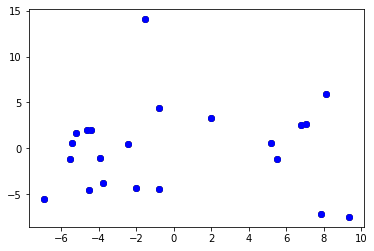

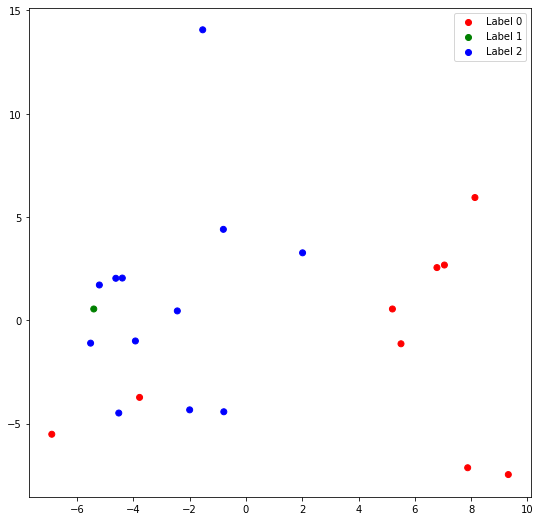

In [308]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["nb_pca_tw"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 

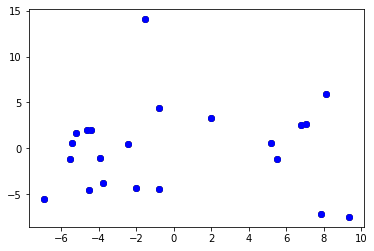

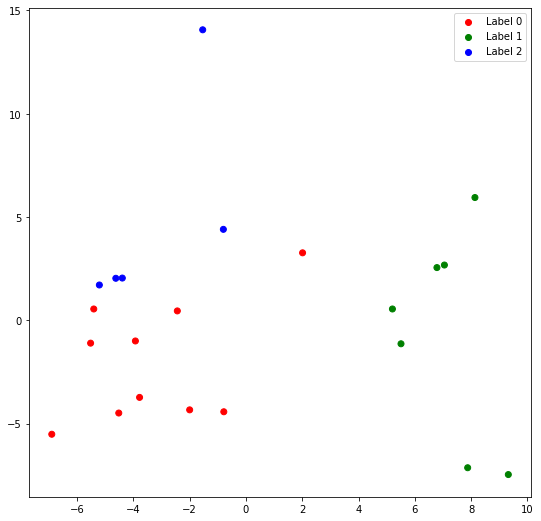

In [309]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_sph"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show()

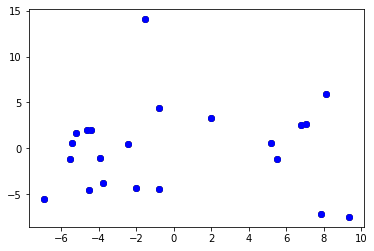

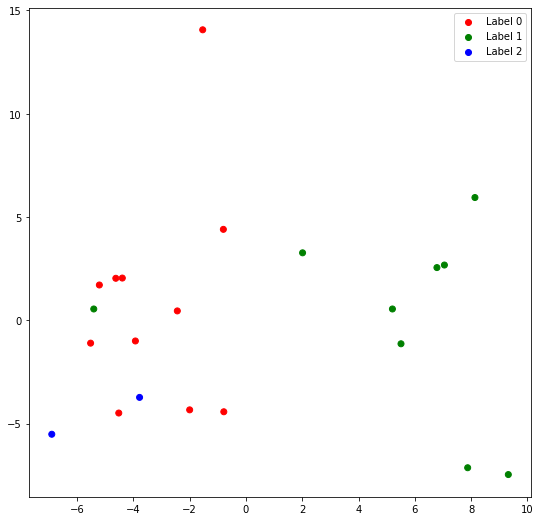

In [310]:
Xax=pca_test_premise_tw[:,0]
Yax=pca_test_premise_tw[:,1]
labels_full = results_premise["bc_pca_tw_full"]
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
  
# Building the colour vector for each data point 
cvec = [colours[label+1] for label in labels_full] 
  
# Defining the scatter plot for each colour 
r = plt.scatter(Xax, Yax, color ='r');
g = plt.scatter(Xax, Yax, color ='g'); 
b = plt.scatter(Xax, Yax, color ='b'); 

  
# Plotting the clustered data 
plt.figure(figsize =(9, 9)) 
plt.scatter(Xax, Yax, c = cvec) 
plt.legend((r, g, b), ('Label 0', 'Label 1', 'Label 2')) 
plt.show() 